In [1]:
from sklearn.datasets.samples_generator import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from matplotlib import pyplot

In [2]:
# prepare a blobs examples with a given random seed
def samples_for_seed(seed):
    # generate samples
    X, Y = make_blobs(n_samples=1000, centers=3, n_features=2,
                     cluster_std=2, random_state=seed)
    # one hot encode output variable
    Y = to_categorical(Y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainY, testY = Y[:n_train], Y[n_train:]
    return trainX, trainY, testX, testY

In [11]:
# define and fit model on a training dataset
def fit_model(trainX, trainY, testX, testY):
    # define model
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu',
                   kernel_initializer='he_uniform'))
    model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd',
                 metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainY, validation_data=(testX, testY),
                       epochs=100, verbose=0)
    return model, history

In [12]:
# summarize the performance of the fit model
def summarize_model(model, history, trainX, trainY, testX, testY):
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainY, verbose=0)
    _, test_acc = model.evaluate(testX, testY, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    # plot loss during training
    pyplot.subplot(211)
    pyplot.title('Loss')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    # plot accuracy during training
    pyplot.subplot(212)
    pyplot.title('Accuracy')
    pyplot.plot(history.history['acc'], label='train')
    pyplot.plot(history.history['val_acc'], label='test')
    pyplot.legend()
    pyplot.show()

In [13]:
# prepare data
trainX, trainY, testX, testY = samples_for_seed(2)

In [14]:
# fit model on train dataset
model, history = fit_model(trainX, trainY, testX, testY)

W1222 06:06:02.771776  3324 deprecation.py:323] From C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1222 06:06:02.876149  3324 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1021: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train: 0.798, Test: 0.834


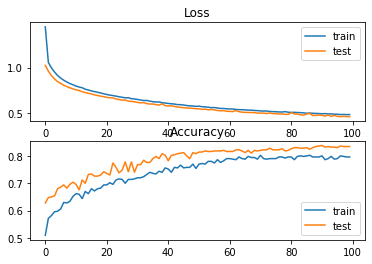

In [15]:
# evaluate model behavior
summarize_model(model, history, trainX, trainY, testX, testY)